### 循环神经网络

In [57]:
import torch
from torch import nn, optim

In [2]:
rnn_cell = nn.RNNCell(input_size=5, hidden_size=7)

In [3]:
rnn_cell

RNNCell(5, 7)

In [4]:
rnn_cell.weight_ih

Parameter containing:
tensor([[-0.2377, -0.2417,  0.2548, -0.2347, -0.3205],
        [-0.3752,  0.2905,  0.0780, -0.2702, -0.2757],
        [ 0.0947, -0.1144,  0.1622,  0.0396, -0.0750],
        [-0.2337, -0.3723,  0.1626,  0.1908, -0.0290],
        [ 0.0578,  0.3158, -0.2207, -0.0131, -0.1399],
        [ 0.3013,  0.2499, -0.2729,  0.1169,  0.2049],
        [-0.3705,  0.1058, -0.2577, -0.3333,  0.3003]], requires_grad=True)

In [25]:
x = torch.randn(1, 5)
h = torch.randn(1, 7)
x,h 

(tensor([[ 1.1633, -0.2817,  0.6146, -0.7942,  1.1087]]),
 tensor([[-1.2154, -0.8558,  1.2882, -0.4825,  0.6010,  0.1243, -0.6590]]))

#### rnn_cell 只能同时处理一个序列，同时返回隐藏向量

In [10]:
rnn_cell(x,h)

tensor([[-0.9590, -0.4640, -0.4947, -0.2481,  0.8601,  0.7232,  0.3454]],
       grad_fn=<TanhBackward>)

In [11]:
rnn = nn.RNN(input_size=5, hidden_size=7)

In [26]:
inputs = torch.randn(3,2,5)
hidden = torch.randn(1,2,7)
inputs,hidden

(tensor([[[ 0.1774,  0.0070, -0.6059, -1.0707, -0.5520],
          [ 1.2063,  1.6557,  0.2222, -0.3588,  1.8640]],
 
         [[-1.3934, -1.1630, -0.3959, -1.1203, -0.2864],
          [ 0.1202,  0.4927,  0.9817, -0.8210, -0.6140]],
 
         [[ 0.1825,  0.8006,  1.1884, -1.0964, -0.3531],
          [ 0.2165, -0.2444, -0.9395,  1.8326,  1.2360]]]),
 tensor([[[-0.2706, -0.4014,  0.2165, -0.3285,  0.0044, -1.2486, -0.1553],
          [-1.8988,  2.9545,  1.1066, -0.2462,  0.1753,  0.4923, -0.1544]]]))

#### rnn 同时处理一串序列，同时返回输出向量序列和隐藏向量

In [27]:
rnn(inputs, hidden)

(tensor([[[-0.4444, -0.4609,  0.7447,  0.2516, -0.6160, -0.3912,  0.3027],
          [-0.1563,  0.8226,  0.9638, -0.1889,  0.3329, -0.2091, -0.6495]],
 
         [[ 0.0087, -0.6314,  0.7540,  0.7118,  0.0426, -0.7547, -0.1045],
          [-0.2297,  0.6234,  0.6741, -0.4801,  0.3139, -0.5479, -0.0180]],
 
         [[-0.4575,  0.0817,  0.5987, -0.0813, -0.1655, -0.1862,  0.4306],
          [ 0.6918, -0.6401,  0.4198,  0.7268,  0.2487, -0.5560, -0.5743]]],
        grad_fn=<StackBackward>),
 tensor([[[-0.4575,  0.0817,  0.5987, -0.0813, -0.1655, -0.1862,  0.4306],
          [ 0.6918, -0.6401,  0.4198,  0.7268,  0.2487, -0.5560, -0.5743]]],
        grad_fn=<StackBackward>))

#### LSTMCell 输入3个： x0, h0, c0; 输出: (h1, c1)

In [28]:
lstm_cell = nn.LSTMCell(input_size=5, hidden_size=7)
lstm_cell

LSTMCell(5, 7)

In [30]:
inputs = torch.randn(1,5)
h0 = torch.randn(1,7)
c0 = torch.randn(1,7)

In [31]:
lstm_cell(inputs, (h0, c0))

(tensor([[ 0.4814, -0.1596, -0.1464,  0.2402, -0.1684, -0.7525,  0.2471]],
        grad_fn=<MulBackward0>),
 tensor([[ 0.7208, -0.2419, -0.2328,  0.3055, -0.2391, -1.6640,  0.5258]],
        grad_fn=<AddBackward0>))

#### LSTM 可直接将序列当成输入 输入3个： x0, h0, c0; 输出: (x1, h1, c1)

In [34]:
inputs = torch.randn(3,2,5)
h0 = torch.randn(1,2,7)
c0 = torch.randn(1,2,7)
lstm = nn.LSTM(input_size=5, hidden_size=7)

In [35]:
output, (h1, c1) = lstm(inputs, (h0, c0)) 

In [37]:
output.size(), h1.size(), c1.size()

(torch.Size([3, 2, 7]), torch.Size([1, 2, 7]), torch.Size([1, 2, 7]))

#### RNN 实例

In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)

In [41]:
input_x = np.sin(steps)
target_y = np.cos(steps)

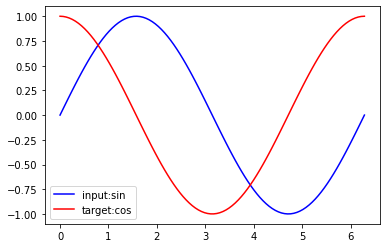

In [49]:
plt.plot(steps, input_x, 'b-', label='input:sin')
plt.plot(steps, target_y, 'r-', label='target:cos')
plt.legend(loc='best')
plt.show()

In [65]:
class LSTM(nn.Module):
    def __init__(self, input_size):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=20,
            batch_first=True,
        )
        self.out = nn.Linear(20, 1)
    
    def forward(self, x, h_state, c_state):
        r_out, (h_state, c_state) = self.lstm(x, (h_state, c_state))
        outputs = self.out(r_out[0, :]).unsqueeze(0)
        return outputs, h_state, c_state
    
    def init_hidden(self):
        h_state = torch.randn(1, 1, 20)
        c_state = torch.randn(1, 1, 20)
        return h_state, c_state

In [66]:
output[0,:]

tensor([[ 0.0611,  0.0012,  0.5596, -0.0371,  0.1414,  0.0026, -0.3297],
        [-0.1263,  0.3488,  0.2579,  0.1039,  0.1051,  0.0454,  0.1045]],
       grad_fn=<SliceBackward>)

In [128]:
lstm = LSTM(input_size=1)
optimizer = optim.Adam(lstm.parameters(), lr=0.001)
loss_func = nn.MSELoss()
h_state, c_state = lstm.init_hidden()

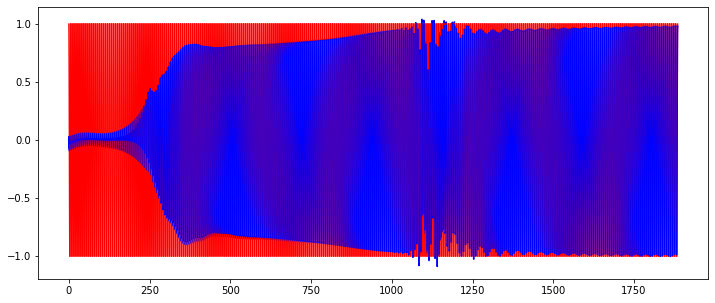

In [129]:
plt.figure(1, figsize=(12,5))
plt.ion()

for step in range(600):
    start, end = step * np.pi, (step+1)*np.pi
    steps = np.linspace(start, end, 100, dtype=np.float32)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    x = torch.from_numpy(x_np).unsqueeze(0).unsqueeze(-1)
    y = torch.from_numpy(y_np).unsqueeze(0).unsqueeze(-1)
    prediction, h_state, c_state = lstm(x, h_state, c_state)
    h_state = h_state.data
    c_state = c_state.data
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw();
    
plt.ioff()
plt.show()